# Module 6 - Clustering for Diverse portfolio analysis

   ### Welcome to the Answer notebook for Module 6 ! 
Make sure that you've submitted the module 5 notebook and unlocked Module 6 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import glob
import pandas as pd
from math import sqrt
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show

In [2]:
print(glob.glob('*.csv'))

[]


In [4]:
allfilenames = [i for i in glob.glob('*.csv')]

In [5]:
#combine all files in the list
prices_list=[]
names_list=[]
for f in allfilenames:
    new=pd.read_csv(f,parse_dates=True)
    prices=new['Close Price']
    prices_list.append(prices)
    names_list.append((new['Symbol'].unique().item()))
    prices_df = pd.concat(prices_list,axis=1,sort=True)
prices_df.sort_index(inplace=True)
prices_df.set_axis(names_list, axis=1, inplace=True)
prices_df.head(20)

,CENTURYPLY,ASIANPAINT,EICHERMOT,AXISBANK,ADANIPORTS,BAJFINANCE,CASTROLIND,BERGEPAINT,GUJALKALI,JETAIRWAYS,...,BAJAJELEC,HDFC,BOMDYEING,GMRINFRA,FORTIS,DRREDDY,ADANIPOWER,IRCON,ASHOKA,CUMMINSIND
0,266.65,1148.05,28930.60,500.10,356.20,1332.95,449.85,259.50,457.35,527.50,...,341.15,1559.50,82.20,17.55,205.25,2675.80,30.25,415.30,216.05,1066.05
1,266.10,1142.85,29362.50,501.50,354.50,1347.75,443.00,261.50,455.25,534.15,...,347.00,205.00,83.40,17.40,207.90,2724.10,32.85,427.00,214.90,1047.75
2,264.85,1154.95,29093.55,502.80,348.55,1324.80,439.55,260.90,472.65,528.90,...,349.85,1566.55,82.25,17.30,205.90,2736.90,33.10,421.40,217.00,1016.45
3,260.35,1151.35,28357.30,492.00,347.90,1314.55,433.95,254.10,461.85,522.70,...,334.10,1552.50,78.95,16.75,196.85,2678.95,31.90,407.10,209.65,1054.45
4,254.05,1123.15,27936.05,501.70,349.45,1289.15,437.10,247.80,455.35,520.40,...,336.20,207.00,77.15,16.95,203.55,2656.45,32.40,399.80,206.25,972.95
5,255.50,1112.55,27189.90,502.30,354.45,1242.15,424.95,249.15,455.25,475.65,...,313.25,1537.05,74.00,16.80,194.80,2608.70,31.45,382.05,201.60,930.80
6,247.95,1098.90,27598.25,500.60,331.65,1233.75,411.90,244.10,435.15,472.85,...,315.55,201.50,70.45,15.90,196.55,2579.45,29.85,363.65,197.65,926.20
7,241.05,1091.20,27364.70,499.30,339.65,1224.35,418.80,242.45,440.50,464.80,...,327.95,1520.60,66.95,14.55,194.35,2516.80,28.00,365.05,196.00,914.80
8,252.65,1113.20,28009.45,507.45,340.75,1258.85,414.45,242.65,443.15,468.95,...,346.20,195.00,69.85,15.20,202.55,2427.70,28.65,360.95,199.55,925.05
9,259.65,1132.45,28351.35,511.45,348.00,1317.80,420.50,258.00,426.20,483.40,...,359.45,1519.85,73.00,15.95,202.75,2414.40,28.90,368.00,199.90,949.95


In [6]:
len(prices_list)

30

In [7]:
len(names_list)

30

In [8]:
names_list

['CENTURYPLY',
 'ASIANPAINT',
 'EICHERMOT',
 'AXISBANK',
 'ADANIPORTS',
 'BAJFINANCE',
 'CASTROLIND',
 'BERGEPAINT',
 'GUJALKALI',
 'JETAIRWAYS',
 'BPCL',
 'ITDC',
 'AMARAJABAT',
 'DHFL',
 'AJANTPHARM',
 'CIPLA',
 'APOLLOTYRE',
 'GAIL',
 'EXIDEIND',
 'IDFC',
 'BAJAJELEC',
 'HDFC',
 'BOMDYEING',
 'GMRINFRA',
 'FORTIS',
 'DRREDDY',
 'ADANIPOWER',
 'IRCON',
 'ASHOKA',
 'CUMMINSIND']

### 6.2 Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [9]:
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)

In [10]:
returns['Volatility']

CENTURYPLY     0.120321
ASIANPAINT     0.067157
EICHERMOT      0.096265
AXISBANK       0.089182
ADANIPORTS     0.099279
BAJFINANCE     0.103263
CASTROLIND     0.143366
BERGEPAINT     0.085810
GUJALKALI      0.123565
JETAIRWAYS     0.200471
BPCL           0.139959
ITDC           0.169290
AMARAJABAT     0.085768
DHFL          14.007242
AJANTPHARM     0.106510
CIPLA          0.081551
APOLLOTYRE     0.099502
GAIL           0.108466
EXIDEIND       0.084290
IDFC           0.115289
BAJAJELEC      0.129111
HDFC          18.115324
BOMDYEING      0.193316
GMRINFRA       0.153571
FORTIS         0.135161
DRREDDY        0.095617
ADANIPOWER     0.195757
IRCON          0.053186
ASHOKA         0.142025
CUMMINSIND     0.095100
Name: Volatility, dtype: float64

In [14]:
returns.drop('DHFL',inplace=True)

In [12]:
prices_df['DHFL']

0        431.40
1       1009.90
2       1055.20
3       1070.00
4       1050.00
5       1072.28
6       1149.00
7       1040.60
8       1043.00
9       1062.15
10       424.45
11      1000.00
12      1012.31
13      1060.00
14      1071.42
15      1175.00
16      1043.61
17      1061.03
18       429.00
19       996.70
20      1012.10
21      1057.02
22      1069.66
23      1175.00
24      1044.18
25      1042.50
26      1057.07
27       417.95
28      1015.00
29      1070.10
         ...   
4762     841.00
4763     789.00
4764     790.00
4765     116.40
4766     955.00
4767     760.00
4768    1008.75
4769     764.96
4770     990.00
4771     975.12
4772     812.05
4773     775.00
4774     842.39
4775     797.90
4776     788.00
4777     835.00
4778     110.95
4779     955.00
4780     850.00
4781     769.00
4782    1000.00
4783     742.38
4784    1229.99
4785     975.00
4786     810.00
4787     754.90
4788     838.50
4789     800.00
4790     721.25
4791     820.25
Name: DHFL, Length: 4792

###### QUERY6.3

###### 6.3 Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

Text(0.5,1,'Elbow curve')

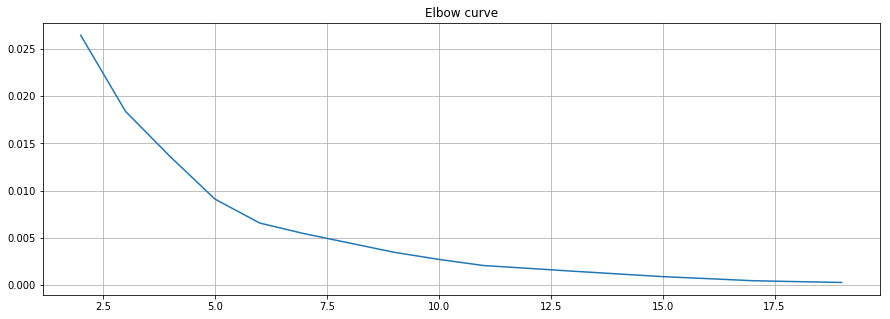

In [18]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

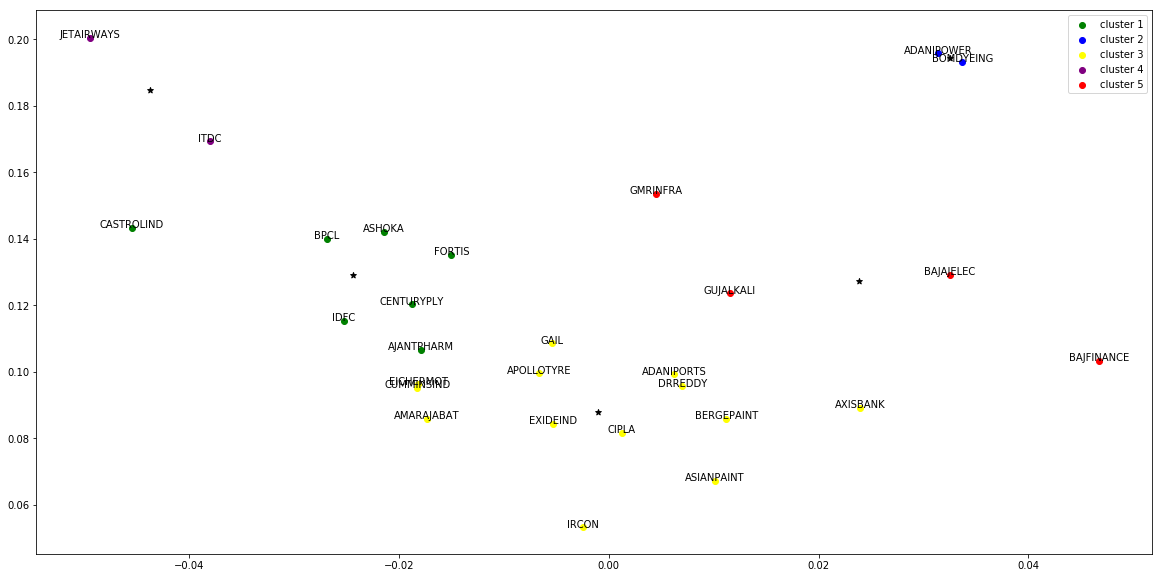

In [19]:

km = KMeans(n_clusters=5, max_iter=100)
km.fit(data)
centroids = km.cluster_centers_
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(data[km.labels_ == 0, 0], data[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data[km.labels_ == 1, 0], data[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(data[km.labels_ == 2, 0], data[km.labels_ == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(data[km.labels_ == 3, 0], data[km.labels_== 3, 1],
            c='purple', label='cluster 4')
plt.scatter(data[km.labels_ == 4, 0], data[km.labels_ == 4, 1],
            c='red', label='cluster 5')
plt.legend()
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black',marker='*',label='centroid')
xs=data[:,0]
ys=data[:,1]
zs=np.asarray(returns.index)
labeling=returns.index
for x,y,z in zip(xs,ys,zs):
    plt.annotate(z,(x,y),ha='center')
plt.show()

 Prepare a separate Data frame to show which stocks belong to the same cluster 

In [20]:
from scipy.cluster.vq import vq
idx,_ = vq(data,centroids)

details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('CENTURYPLY', 0)
('ASIANPAINT', 2)
('EICHERMOT', 2)
('AXISBANK', 2)
('ADANIPORTS', 2)
('BAJFINANCE', 4)
('CASTROLIND', 0)
('BERGEPAINT', 2)
('GUJALKALI', 4)
('JETAIRWAYS', 3)
('BPCL', 0)
('ITDC', 3)
('AMARAJABAT', 2)
('AJANTPHARM', 0)
('CIPLA', 2)
('APOLLOTYRE', 2)
('GAIL', 2)
('EXIDEIND', 2)
('IDFC', 0)
('BAJAJELEC', 4)
('BOMDYEING', 1)
('GMRINFRA', 4)
('FORTIS', 0)
('DRREDDY', 2)
('ADANIPOWER', 1)
('IRCON', 2)
('ASHOKA', 0)
('CUMMINSIND', 2)


In [28]:
dict={}
grp_0=[]
grp_1=[]
grp_2=[]
grp_3=[]
grp_4=[]

for name, cluster in zip(returns.index,idx):
    if(cluster==0):
        grp_0.append(name)
    if(cluster==1):
        grp_1.append(name)
    if(cluster==2):
        grp_2.append(name)
    if(cluster==3):
        grp_3.append(name)
    if(cluster==4):
        grp_4.append(name)
    

In [29]:
keys=['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5']
dict['cluster_1']=grp_0
dict['cluster_2']=grp_1
dict['cluster_3']=grp_2
dict['cluster_4']=grp_3
dict['cluster_5']=grp_4

In [31]:
df = pd.DataFrame.from_dict(dict, orient='index')

In [33]:
df=df.transpose()

In [34]:
df

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,CENTURYPLY,BOMDYEING,ASIANPAINT,JETAIRWAYS,BAJFINANCE
1,CASTROLIND,ADANIPOWER,EICHERMOT,ITDC,GUJALKALI
2,BPCL,None,AXISBANK,None,BAJAJELEC
3,AJANTPHARM,None,ADANIPORTS,None,GMRINFRA
4,IDFC,None,BERGEPAINT,None,None
5,FORTIS,None,AMARAJABAT,None,None
6,ASHOKA,None,CIPLA,None,None
7,None,None,APOLLOTYRE,None,None
8,None,None,GAIL,None,None
9,None,None,EXIDEIND,None,None
